Importing libraries

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import mplcyberpunk
import ast

Load and inspect European Repository of Cyber Incidents (EuRepoC) attack data

Source: [EuRepoC database](https://eurepoc.eu/database/)

In [154]:
raw_data_eu = 'EuRepoC_Global_Database_1.1.xlsx'
df_data_eu = pd.read_excel(raw_data_eu)
print(f'Main information about data: \nShape:{df_data_eu.shape}')
print(f'\nColumn names:{df_data_eu.columns}')
print(f'\nFirst 10 rows:\n{df_data_eu.head(10)}')

Main information about data: 
Shape:(1643, 81)

Column names:Index(['ID', 'name', 'description', 'start_date', 'end_date',
       'inclusion_criteria', 'inclusion_criteria_subcode',
       'source_incident_detection_disclosure', 'incident_type',
       'receiver_name', 'receiver_country', 'receiver_region',
       'receiver_category', 'receiver_category_subcode', 'initiator_name',
       'initiator_country', 'initiator_category', 'initiator_category_subcode',
       'number_of_attributions', 'attribution_date', 'attribution_type',
       'attribution_basis', 'attributing_actor', 'attribution_it_company',
       'attributing_country', 'attributed_initiator',
       'attributed_initiator_country', 'attributed_initiator_category',
       'attributed_initiator_subcategory', 'sources_attribution',
       'cyber_conflict_issue', 'offline_conflict_issue',
       'offline_conflict_name_HIIK', 'offline_conflict_intensity',
       'offline_conflict_intensity_subcode', 'number_of_political_respon

Select relevant columns from EuRepoC attack data

In [155]:
selected_columns = ['ID', 'name', 'description', 'start_date', 'end_date', 'incident_type',
                    'receiver_country', 'receiver_category', 'receiver_category_subcode',
                    'initiator_country']
df_data_eu = df_data_eu[selected_columns]
print(df_data_eu.head())

   ID                                                     name  \
0   2      Cyberwar Azerbaijan-Armenia 2000/Azerbaijani Attack   
1   3  Cyberwar Azerbaijan-Armenia 2000/Armenian Counterattack   
2   4                                Taiwan Election Hack 2000   
3   5                              "First Sino-US-Cyber-War" I   
4   6                             "First Sino-US-Cyber-War" II   

                                                                                                                                                     description  \
0                          Azerbaijani Hackers took down and defaced webpages of the Armenian state TV and webpages with information about the Armenia genocide.   
1                                               In response to the previous attack Armenian hacker group Liazor took down the webpages of many Azerbaijani users   
2                                 Chinese hackers succeeded in attacking several government websites after Mr C

Filter EuRepoC attack data to attacks on state institutions

In [156]:
df_data_eu = df_data_eu[df_data_eu['receiver_category'].str.contains(
                    'State institutions / political system', na=False)]

Identify unique incident types

In [157]:
columns_to_check_uniques = ['incident_type']
for col in columns_to_check_uniques:
    unique_values = df_data_eu[col].unique()
    print(f'Unique values in {col}: {unique_values}\n')

Unique values in incident_type: ['Disruption' 'Data theft' 'Data theft; Hijacking with Misuse'
 'Data theft; Hijacking without Misuse' 'Hijacking without Misuse'
 'Data theft; Disruption' 'Disruption; Hijacking with Misuse'
 'Data theft & Doxing' 'Data theft; Disruption; Hijacking with Misuse'
 'Data theft & Doxing; Disruption' 'Hijacking with Misuse'
 'Data theft & Doxing; Hijacking with Misuse'
 'Data theft & Doxing; Disruption; Ransomware'
 'Disruption; Hijacking with Misuse; Ransomware' 'Disruption; Ransomware'
 'Data theft; Hijacking with Misuse; Ransomware'
 'Data theft & Doxing; Disruption; Hijacking with Misuse; Ransomware'
 'Data theft & Doxing; Disruption; Hijacking with Misuse'
 'Data theft; Disruption; Hijacking with Misuse; Ransomware'
 'Data theft; Ransomware']



Group EuRepoC attack data by country and count occurrences

In [158]:
df_counties = df_data_eu[['receiver_country', 'initiator_country']]
df_counties = df_counties.dropna()

# Define a function to safely evaluate the string representations as lists
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

# Select columns of interest and apply safe_eval
selected_columns = ['receiver_country', 'initiator_country']
for col in selected_columns:
    df_counties[col] = df_counties[col].apply(safe_eval)
# Flatten and count occurrences of each country for both columns
all_countries = [country if country not in ('Not available', 'Unknown') else 'Unknown'
                 for sublist in df_counties['receiver_country'] for country in sublist]
country_counts_receiver = pd.Series(all_countries).value_counts()
df_country_counts_receiver = country_counts_receiver.reset_index()
df_country_counts_receiver.columns = ['country_receiver', 'count_receiver']
df_country_counts_receiver['country_receiver'].replace({'Not available': 'Unknown'}, inplace=True)

all_countries = [country if country not in ('Not available', 'Unknown') else 'Unknown'
                 for sublist in df_counties['initiator_country'] for country in sublist]
country_counts_initiator = pd.Series(all_countries).value_counts()
df_country_counts_initiator = country_counts_initiator.reset_index()
df_country_counts_initiator.columns = ['country_initiator', 'count_initiator']

print('Receiver Country Counts:\n', df_country_counts_receiver)
print('\nInitiator Country Counts:\n', df_country_counts_initiator)

Receiver Country Counts:
                                         country_receiver  count_receiver
0                                          United States             220
1                                                 Russia              79
2                                                  India              74
3                                                  Spain              64
4                                                 Israel              58
..                                                   ...             ...
147                                            Swaziland               1
148                                                Nauru               1
149  Organization for Security and Cooperation in Europe               1
150                                              Namibia               1
151                               Bosnia and Herzegovina               1

[152 rows x 2 columns]

Initiator Country Counts:
             country_initiator  count_initiator

Identify top receiver and initiator countries in EuRepoC attacks.
* The top three most frequently targeted countries are the United States, Russia, and India, while the top three originating countries are China, Russia, and Iran. Concerns have been expressed about the activities of these countries: 
[Germany Warns Of Cyber Attacks By Russia, Iran, China](https://www.iranintl.com/en/202307077848),
[Australia says state-sponsored attacks from China, Russia and Iran made cyberspace a ‘battleground’](https://www.scmp.com/news/asia/australasia/article/3198374/australia-says-state-sponsored-attacks-china-russia-and-iran-made-cyberspace-battleground).
* It's worth noting that in almost half of the cases, the originating country is unknown.

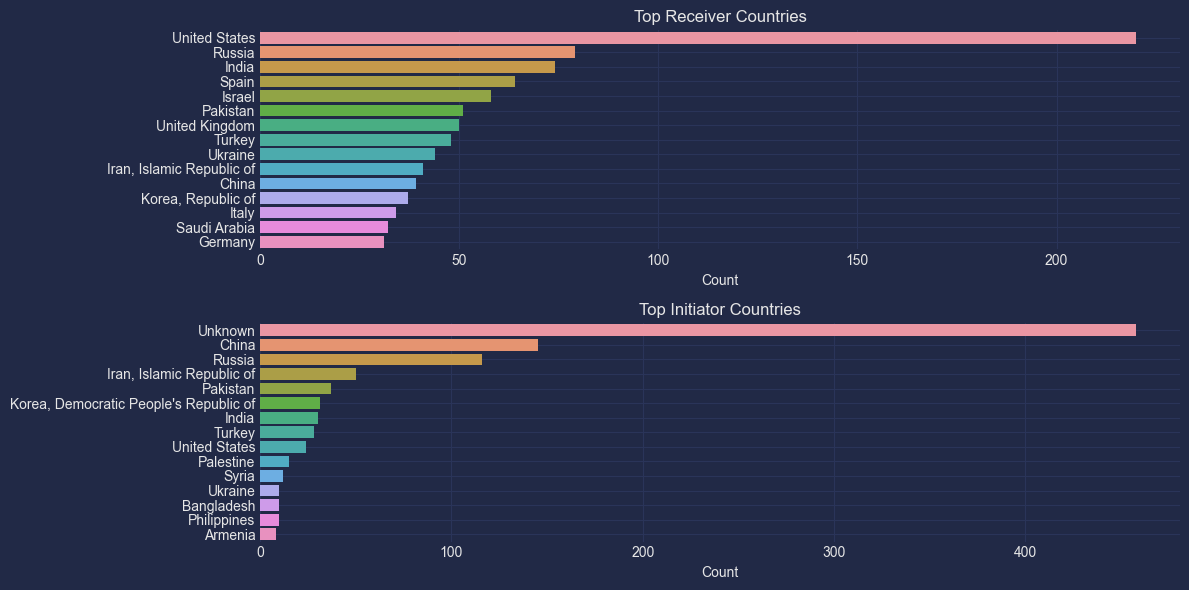

In [159]:
top_n = 15

# Sort the DataFrames by count in descending order and take the top countries
top_20_receiver = df_country_counts_receiver.sort_values(by='count_receiver', ascending=False).head(top_n)
top_20_initiator = df_country_counts_initiator.sort_values(by='count_initiator', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
sns.barplot(x='count_receiver', y='country_receiver', data=top_20_receiver, orient='h')
plt.xlabel('Count')
plt.ylabel('')
plt.title('Top Receiver Countries')
plt.grid(True)

plt.subplot(2, 1, 2)
sns.barplot(x='count_initiator', y='country_initiator', data=top_20_initiator, orient='h')
plt.xlabel('Count')
plt.ylabel('')
plt.title('Top Initiator Countries')
plt.grid(True)
plt.tight_layout()
plt.show()

Info about Lithuania related attacks

In [188]:
country = 'Lithuania'
df_country_rec = df_country_counts_receiver[df_country_counts_receiver['country_receiver'] == country]
df_country_init = df_country_counts_initiator[df_country_counts_initiator['country_initiator'] == country]

formatted_rec = df_country_rec.to_string(index=False)
formatted_init = df_country_init.to_string(index=False)

if df_country_rec.empty:
    print(f"No data for Receiver Countries for {country}")
else:
    print(f"Receiver Countries for {country}:\n{formatted_rec}\n\n")

if df_country_init.empty:
    print(f"No data for Initiator Countries for {country}")
else:
    print(f"Initiator Countries for {country}:\n{formatted_init}")

Receiver Countries for Lithuania:
country_receiver  count_receiver
       Lithuania               6


No data for Initiator Countries for Lithuania


In [195]:
filtered_country = df_data_eu[df_data_eu['receiver_country'].apply(lambda x: country in x)]
filtered_country = filtered_country[['start_date', 'name', 'initiator_country', 'description', ]]
pd.set_option('display.max_colwidth', None)
filtered_country = filtered_country.style.hide(axis="index")
display(filtered_country)

start_date,name,initiator_country,description
2008-06-01,Anti-Lithuanian Defacement 2008,['Russia'],"300 Lithuanian official and private websites were defaced with communist symbols after the ban on communist symbols in the country, but the Government didn't accused Russia directly"
2015-01-01,Russia vs. Lithuanian Government,['Russia'],Russia targets Lithuanian government computers
2017-03-01,"Operation Ghostwriter: a Belarusian/Russian APT UNC1151 with links to the secret services stole and leaked information of various targets in Germany, Lithuania, Latvia and Poland until 2021",['Russia'],"The European Council formally attributed responsibility to the Russian state in late September 2021 for the Ghostwriter campaign that has been ongoing since at least 2017, after Germany accused Russia of involvement in the cyber operation earlier that month. The campaign here primarily targeted government as well as press personnel in Lithuania, Latvia and Poland, and since 2021, Germany. In Poland, the emails of Polish Chief of Chancellery Michal Dworczyk were published over many months in starting in June 2021, according to Dworczyk himself and other members of the government. The emails contained information on questionable government decisions. Michal Dworczyk resigned on 30 September 2022. The European Union already issued a Declaration by the High Representative in September 2021, condemning the Ghostwriter campaign."
2019-08-01,FamousSparrow,['Unknown'],"The new cyber espionage group FamousSparrow, active since at least 2019, exploited the already known ProxyLogon vulnerability in early March 2021. The group's main targets are hotels in particular, but also government organizations, engineering firms, as well as law firms worldwide."
2020-11-01,Emails from Lithuanian Ministry for sale,['Unknown'],"In a data trading forum, 1.6 million emails from the Lithuanian Foreign Ministry were offered for sale. The Lithuanian president also announces that there are indications that sensitive and secret data were stolen in a cyberattack in November 2020."
2021-03-01,ChamelGang,['Unknown'],"The previously unknown APT ChamelGang targeted institutions, such as the government, aviation and energy sectors, of a total of ten countries in two attacks. The group disguised its malware and network infrastructure as legitimate domains, such as McAffee, Microsoft, or TrendMicro."


Count unique receiver and initiator countries by month in EuRepoC attack data

In [160]:
df_counties = df_data_eu[['start_date', 'receiver_country', 'initiator_country']].dropna()

# Define a function to safely evaluate the string representations as lists
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

# Apply safe_eval to the 'receiver_country' and 'initiator_country' columns
for col in ['receiver_country', 'initiator_country']:
    df_counties[col] = df_counties[col].apply(safe_eval)

# Replace 'Not available' with 'Unknown' in both columns
df_counties['receiver_country'] = df_counties['receiver_country'].apply(lambda x:
                                                    ['Unknown' if c == 'Not available' else c for c in x])
df_counties['initiator_country'] = df_counties['initiator_country'].apply(lambda x:
                                                    ['Unknown' if c == 'Not available' else c for c in x])

# Create a new column for the month
df_counties['month'] = pd.to_datetime(df_counties['start_date']).dt.to_period('M')

# Calculate the number of unique 'receiver_country' per month
receiver_country_counts = df_counties.groupby('month')['receiver_country'].apply(lambda x:
                                            len(set([country for sublist in x for country in sublist])))
df_receiver_country_by_month = receiver_country_counts.reset_index()
df_receiver_country_by_month.columns = ['Date', 'unique receiver countries']

initiator_country_counts = df_counties.groupby('month')['initiator_country'].apply(lambda x: 
                                            len(set([country for sublist in x for country in sublist])))
df_initiator_country_by_month = initiator_country_counts.reset_index()
df_initiator_country_by_month.columns = ['Date', 'unique initiator countries']

print('Number of unique receiver countries attacked each month:')
print(df_receiver_country_by_month)

print('\nNumber of unique initiator countries attacked each month:')
print(df_initiator_country_by_month)

Number of unique receiver countries attacked each month:
        Date  unique receiver countries
0    2000-01                          1
1    2000-05                          1
2    2001-01                          1
3    2001-05                          1
4    2002-01                          1
..       ...                        ...
182  2022-11                          3
183  2022-12                          6
184  2023-01                          9
185  2023-02                          2
186  2023-03                          4

[187 rows x 2 columns]

Number of unique initiator countries attacked each month:
        Date  unique initiator countries
0    2000-01                           1
1    2000-05                           1
2    2001-01                           1
3    2001-05                           1
4    2002-01                           1
..       ...                         ...
182  2022-11                           3
183  2022-12                           2
184  2023-0

Count unique receiver and initiator countries by year in EuRepoC attack data

In [161]:
df_counties = df_data_eu[['start_date', 'receiver_country', 'initiator_country']].dropna()

# Define a function to safely evaluate the string representations as lists
def safe_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

# Apply safe_eval to the 'receiver_country' and 'initiator_country' columns
for col in ['receiver_country', 'initiator_country']:
    df_counties[col] = df_counties[col].apply(safe_eval)

# Replace 'Not available' with 'Unknown' in both columns
df_counties['receiver_country'] = df_counties['receiver_country'].apply(lambda x:
                                                    ['Unknown' if c == 'Not available' else c for c in x])
df_counties['initiator_country'] = df_counties['initiator_country'].apply(lambda x:
                                                    ['Unknown' if c == 'Not available' else c for c in x])

# Create a new column for the year
df_counties['year'] = pd.to_datetime(df_counties['start_date']).dt.to_period('Y')

# Calculate the number of unique 'receiver_country' per year
receiver_country_counts = df_counties.groupby('year')['receiver_country'].apply(lambda x:
                                            len(set([country for sublist in x for country in sublist])))
df_receiver_country_by_year = receiver_country_counts.reset_index()
df_receiver_country_by_year.columns = ['Date', 'unique receiver countries']

initiator_country_counts = df_counties.groupby('year')['initiator_country'].apply(lambda x: 
                                             len(set([country for sublist in x for country in sublist])))
df_initiator_country_by_year = initiator_country_counts.reset_index()
df_initiator_country_by_year.columns = ['Date', 'unique initiator countries']

print('Number of unique receiver countries attacked each year:')
print(df_receiver_country_by_year)

print('\nNumber of unique initiator countries attacked each year:')
print(df_initiator_country_by_year)

Number of unique receiver countries attacked each year:
    Date  unique receiver countries
0   2000                          2
1   2001                          2
2   2002                          1
3   2003                          2
4   2004                          3
5   2005                         16
6   2006                         17
7   2007                         41
8   2008                         29
9   2009                         31
10  2010                         34
11  2011                         56
12  2012                         39
13  2013                         63
14  2014                         48
15  2015                         49
16  2016                         79
17  2017                         64
18  2018                         54
19  2019                         64
20  2020                         34
21  2021                         49
22  2022                         43
23  2023                         13

Number of unique initiator countries attack

Plot the number of unique receiver and initiator countries attacked each month

In [162]:


# Convert 'Date' column to timestamp, and then to datetime
df_receiver_country_by_month['Date'] = df_receiver_country_by_month['Date'].dt.to_timestamp()
df_initiator_country_by_month['Date'] = df_initiator_country_by_month['Date'].dt.to_timestamp()

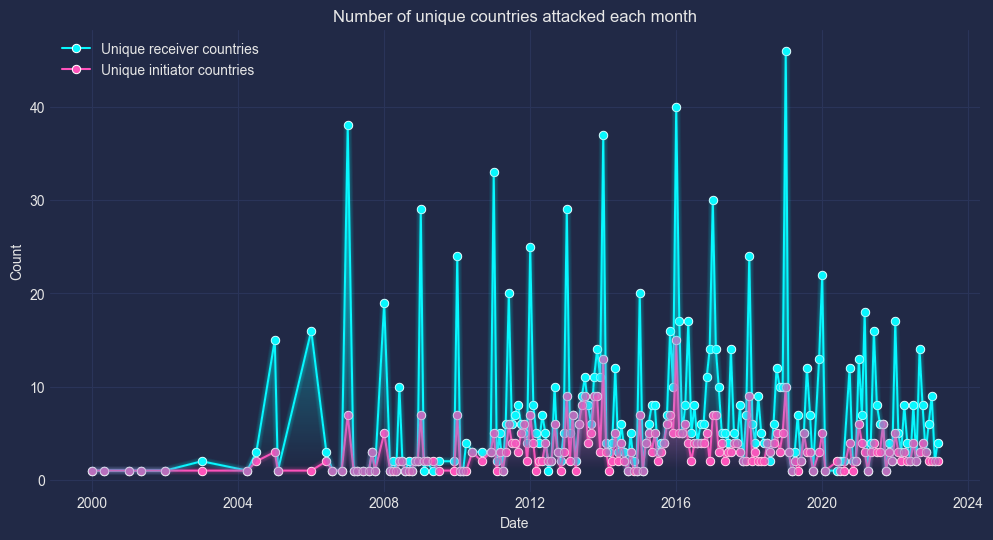

In [163]:


plt.figure(figsize=(12, 6))

# Plot the number of unique receiver countries
sns.lineplot(data=df_receiver_country_by_month, x='Date', y='unique receiver countries',
             label='Unique receiver countries', marker='o')

# Plot the number of unique initiator countries
sns.lineplot(data=df_initiator_country_by_month, x='Date', y='unique initiator countries',
             label='Unique initiator countries', marker='o')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of unique countries attacked each month')

plt.style.use('cyberpunk')
mplcyberpunk.make_lines_glow(diff_linewidth=0.5)
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.9)
plt.grid(True)
plt.show()

In [164]:
# Convert 'Date' column to timestamp, and then to datetime
df_receiver_country_by_year['Date'] = df_receiver_country_by_year['Date'].dt.to_timestamp()
df_initiator_country_by_year['Date'] = df_initiator_country_by_year['Date'].dt.to_timestamp()

Create a subset of receiver and initiator country data from 2013-01 to 2023-01

In [165]:
df_receiver_filtred = df_receiver_country_by_month[(df_receiver_country_by_month['Date'] >= '2013-01')
                                                    & (df_receiver_country_by_month['Date'] <= '2023-01')]
df_initiator_filtred = df_initiator_country_by_month[(df_initiator_country_by_month['Date'] >= '2013-01')
                                                    & (df_initiator_country_by_month['Date'] <= '2023-01')]

Resample receiver and initiator country data to monthly frequency and sum the values

In [166]:
df_receiver_filtred = df_receiver_filtred.copy()  # Create a copy of the DataFrame
df_receiver_filtred['Date'] = pd.to_datetime(df_receiver_filtred['Date'])
df_receiver_filtred.set_index('Date', inplace=True)

df_resampled_receiver = df_receiver_filtred.resample('M').sum()

df_initiator_filtred = df_initiator_filtred.copy()  # Create a copy of the DataFrame
df_initiator_filtred['Date'] = pd.to_datetime(df_initiator_filtred['Date'])
df_initiator_filtred.set_index('Date', inplace=True)

df_resampled_initiator = df_initiator_filtred.resample('M').sum()

Plot trends in attack types and count of unique receiver and initiator countries attacked in last 10 years.
* The number of counties attacked in January used to be significantly higher than in any other month. It is not surprising—the holiday season is a prime time for cyberattacks as consumers and businesses are distracted and vulnerable: [Cyber Attacks During Holidays: Why the Spike?](https://thrivedx.com/resources/article/cyber-attacks-during-holidays).
* However, the frequency of attacks is no longer predictable, and the peak in January is no longer significant compared to the period before 2021.

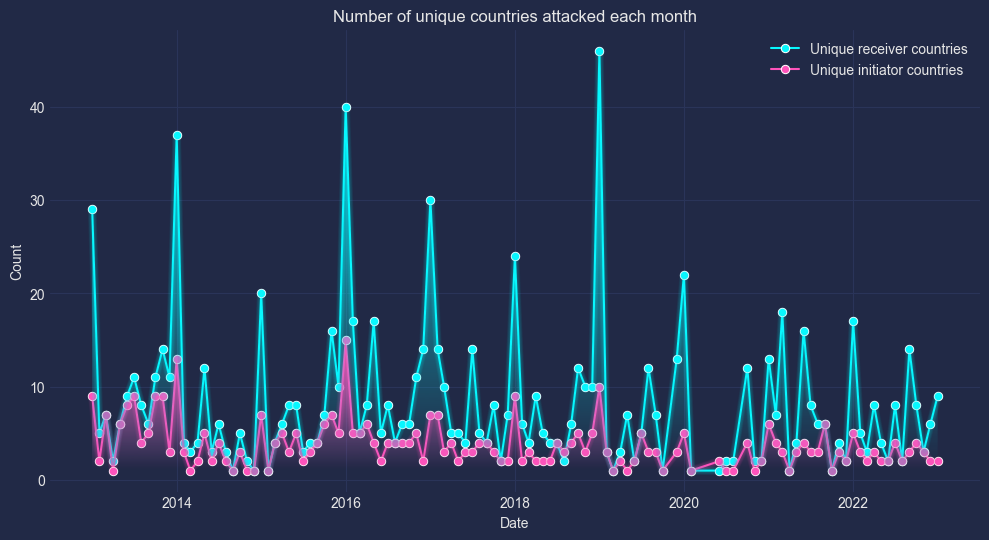

In [167]:
plt.figure(figsize=(12, 6))

# Plot the number of unique receiver countries
sns.lineplot(data=df_receiver_filtred, x='Date', y='unique receiver countries',
             label='Unique receiver countries', marker='o')

# Plot the number of unique initiator countries
sns.lineplot(data=df_initiator_filtred, x='Date', y='unique initiator countries',
             label='Unique initiator countries', marker='o')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of unique countries attacked each month')

plt.legend()
mplcyberpunk.make_lines_glow(diff_linewidth=0.5)
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.9)
plt.grid(True)
plt.show()

Plot the number of unique receiver and initiator countries attacked each year

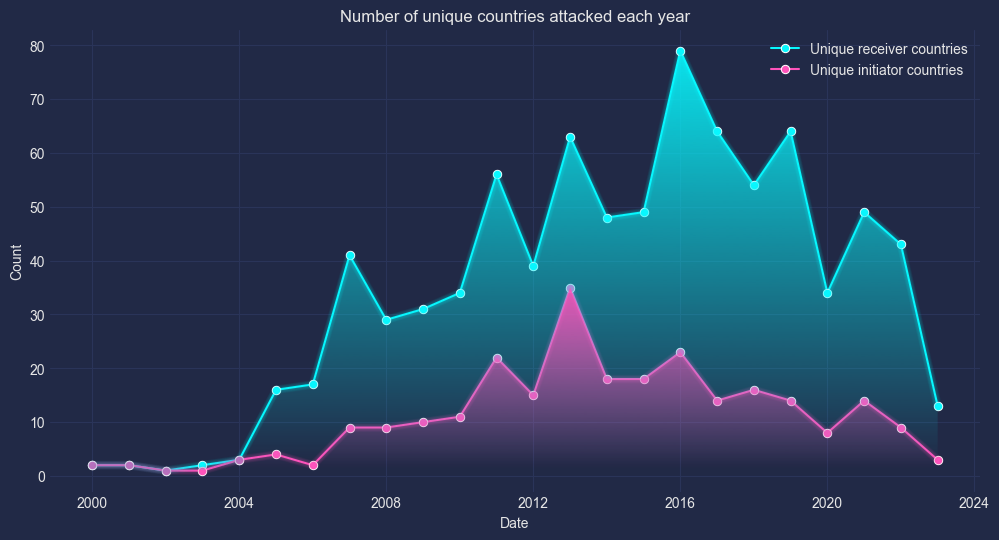

In [168]:
plt.figure(figsize=(12, 6))

# Plot the number of unique receiver countries
sns.lineplot(data=df_receiver_country_by_year, x='Date', y='unique receiver countries',
             label='Unique receiver countries', marker='o')

# Plot the number of unique initiator countries
sns.lineplot(data=df_initiator_country_by_year, x='Date', y='unique initiator countries',
             label='Unique initiator countries', marker='o')

plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Number of unique countries attacked each year')

plt.legend()
mplcyberpunk.make_lines_glow(diff_linewidth=0.5)
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.9)
plt.grid(True)
plt.show()


Duration of attacks

In [169]:
df_duration = df_data_eu[['start_date', 'end_date', 'name', 'description']]
df_duration = df_duration.dropna()

In [170]:
# Convert columns to a period column with daily frequency
df_duration['start_date'] = pd.to_datetime(df_duration['start_date']).dt.to_period('D')
df_duration['end_date'] = pd.to_datetime(df_duration['end_date']).dt.to_period('D')

In [171]:
# Convert 'start_date' and 'end_date' columns to timestamp
df_duration['start_date'] = df_duration['start_date'].dt.to_timestamp()
df_duration['end_date'] = df_duration['end_date'].dt.to_timestamp()

In [172]:
# Calculate duration, rearrange columns, and filter data
df_duration['duration'] = ((df_duration['end_date'] - df_duration['start_date']).dt.days + 1)
column_order = ['start_date', 'end_date','duration', 'name', 'description']
df_duration = df_duration[column_order]

# Sort and filter data by date difference
df_duration = df_duration.sort_values(by='duration')
df_duration = df_duration[df_duration['duration'] > 0].sort_values(by='duration', ascending=False)

Filter the data to exclude instances where the date difference is greater than 365 days, as it is likely an error in the assignment of end dates

In [173]:
df_duration = df_duration[df_duration['duration'] < 365]
df_duration_grouped = df_duration.groupby('duration').size().reset_index(name='count')
print(df_duration_grouped.sort_values(by='count', ascending=False))

    duration  count
0          1    527
1          2     32
28        32     21
2          3     15
37        62      9
..       ...    ...
39        74      1
14        15      1
38        63      1
59       173      1
82       336      1

[83 rows x 2 columns]


* There are 527 instances with a 1-day difference, 32 instances with a 2-day difference, 21 instances with a 32-day difference, 15 instances with a 3-day difference, and 9 instances with a 62-day difference.
* Additionally, the instances with a 32-day and 62-day difference might also be associated with potential issues related to incorrectly assigned months.

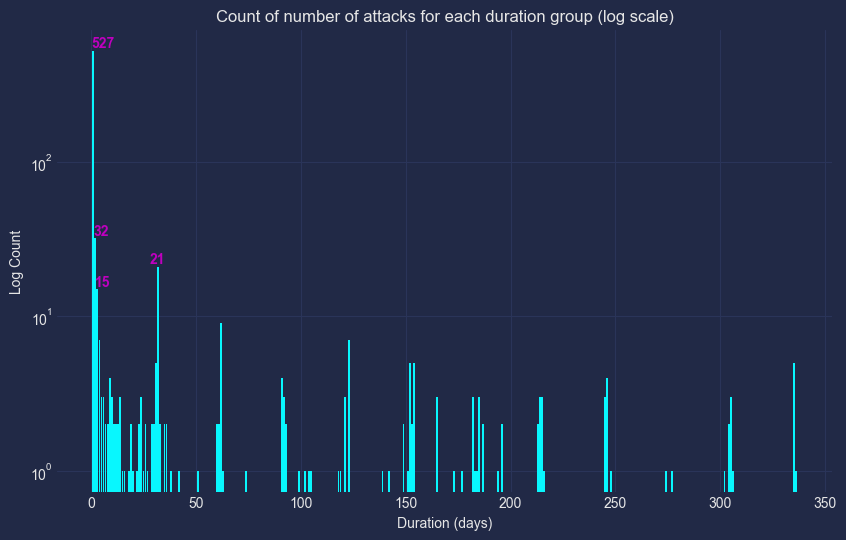

In [174]:
plt.figure(figsize=(10, 6))
plt.bar(df_duration_grouped['duration'], df_duration_grouped['count'], log=True)

for i, (group, value) in enumerate(zip(df_duration_grouped['duration'], df_duration_grouped['count'])):
    if value > 10:
        plt.text(i, value, str(value), ha='left', va='bottom', color='m', weight='bold')

plt.yscale('log')  # Set log scale on the y-axis
plt.title('Count of number of attacks for each duration group (log scale)')
plt.xlabel('Duration (days)')
plt.ylabel('Log Count')
plt.show()

Description of attacks with duration longer than 50 days
* It seems that most of the dates start with the 1st day of the month, indicating that when the exact day is unknown, it is very likely that the first day of the month is set as the start day.

In [175]:
df_description = df_duration[['start_date', 'duration', 'name', 'description']]
df_description = df_description[df_description['duration'] > 50].sort_values(by='duration', ascending=False)
df_description['start_date'] = df_description['start_date'].dt.strftime('%Y-%m-%d')
pd.set_option('display.max_colwidth', None)
styled_df = df_description.style.hide(axis="index")
display(styled_df)

start_date,duration,name,description
2016-02-01,336,WhiteBear project by Turla,"WhiteBear, a project related to Turla, spied on embassies and consulates worldwide."
2018-01-01,335,North Korean Defectors Hack,"The South Korean Resettlement Agency was hacked, and some hundred sets of personal data of North Korean refugees were leaked"
2017-01-01,335,"""Operation/Group Rancor""","The RANCOR APT group has been targeting political entities in Singapore, Cambodia, and Thailand, and likely in other countries, using two previously unknown strain of malware. The two malware families were tracked as DDKONG and PLAINTEE. The group might be related to the Chinese-based group DragonOk."
2015-01-01,335,Australia's Bureau of Meteorology Attack 2015,Probably Chinese Spies leaked sensitive Data of Australias govermental systems
2017-01-01,335,"""Bundeshack""","The russia APT Turla attacked the German government, after Fancy Bear was the suspect at the beginning of the investigation."
2017-01-01,335,"""Operation PZChao""","""Operation PZChao"" targets US and Asian organisations with cyber-attacks reminiscent of Iron Tiger - but this time with the ability to drop trojans, conduct espionage, and mine bitcoin. Researchers spectaculate that the same Chinese-based APT (APT27 aka Emissary Panda) as in the Iron Tiger operation takes part in the new project but this is not proven yet."
2017-03-01,306,DarkHydrusin 2017,The hacker group DarkHydrusaka Copy Kittenaka LazyMeerkat in 2017 mainly hacked the governmental and educational sector of different Middle East countries. The hacks are mainly harvesting attacks.
2019-01-01,305,Turlas New Waterhole,"Turla created a watering hole, with which they managed to compromise various Armenian web pages"
2021-01-01,305,Police surveillance footage leak,"The transparency collective Distributed Denial of Secrets ( DDoSecrets ) released more than 600 hours of aerial surveillance footage of police in Texas and Georgia in November 2021 after the group obtained it through an unknown source. Three months earlier, it was revealed that Dallas police lost 22 terabytes of case data and recovered only 14 terabytes."
2015-01-01,305,Conflict around South Chinese Sea,"Nanhaishu hackers target Philippine Justice Department, APE Cand intl. Lawfirm, all involved in South China Sea dispute"
